In [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling), we use the inverse cumulative distribution function (CDF) to generate random numbers in a given distribution. But why does this work?

This post takes a look at a couple different approaches to understand this. Experimentally, we can see that the distribution of the CDF sample values is uniform. And this fact is why inverse transform sampling works. We can use this fact to generate random numbers in a given distribution, using random numbers in any other arbitrary distribution.

Let's start with some of the definitions we will use. We want to generate random numbers according to a given *probability density function* (PDF) $f(x)$. The probability density function $f(x)$ and the *cumulative distribution function* $F(x)$ are related to each other by an integral:

$$
F(x) = \int f(x) dx
$$

Let's start with a simple experimental observation of normally distributed random numbers.

Let's start with a simple density function, the uniform density function *U* in the interval $[0, 1]$. The probability density is constant everywhere in the interval:

$$
F(x) = \int cdx = cx+d
$$

We can use the following two constraints, $U(0)=0$ and $U(1)=1$, to obtain

$$
U(x) = x.
$$

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Experimental observation of CDF(X) distribution

Let's observe the distribution of normally distributed random numbers, when we plug the into the CDF.

In [2]:
rng = np.random.default_rng()

(array([ 938., 1018.,  987.,  976., 1004.,  978., 1073., 1003., 1030.,
        1014., 1040.,  979.,  918.,  964.,  964.,  998., 1012., 1016.,
        1023.,  965., 1009.,  994.,  938.,  963., 1054.,  998., 1021.,
        1009.,  955., 1012.,  984.,  994.,  962., 1010., 1030., 1043.,
        1035.,  971., 1015.,  962.,  969., 1058., 1054.,  974.,  969.,
         981., 1034., 1002., 1009., 1091.]),
 array([1.82893538e-05, 2.00176589e-02, 4.00170285e-02, 6.00163981e-02,
        8.00157677e-02, 1.00015137e-01, 1.20014507e-01, 1.40013876e-01,
        1.60013246e-01, 1.80012616e-01, 2.00011985e-01, 2.20011355e-01,
        2.40010724e-01, 2.60010094e-01, 2.80009463e-01, 3.00008833e-01,
        3.20008203e-01, 3.40007572e-01, 3.60006942e-01, 3.80006311e-01,
        4.00005681e-01, 4.20005050e-01, 4.40004420e-01, 4.60003790e-01,
        4.80003159e-01, 5.00002529e-01, 5.20001898e-01, 5.40001268e-01,
        5.60000637e-01, 5.80000007e-01, 5.99999377e-01, 6.19998746e-01,
        6.39998116e-01, 

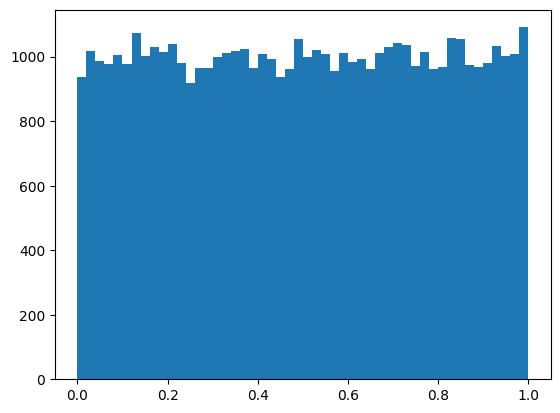

In [4]:
n_normal = rng.normal(loc=0.0, scale=1.0, size=50000)
n_cdf = np.array([0.5 * (1.0 + math.erf(x / (math.sqrt(2.0)))) for x in n_normal])
plt.hist(n_cdf, bins=50)

We obtain a very nice uniform distribution of values between 0 and 1.